# Matbench Dielectric Dataset

Exploratory Data Analysis (EDA). [MPContribs link](https://ml.materialsproject.org/projects/matbench_dielectric)


In [ ]:
# matminer needed for loading data
!pip install pymatviz matminer

In [ ]:
import plotly.express as px
import plotly.io as pio
from matminer.datasets import load_dataset
from tqdm import tqdm

import pymatviz as pmv
from pymatviz.enums import Key


__author__ = "Janosh Riebesell"
__date__ = "2022-03-19"

# make plotly figures render both locally and on GitHub.
# https://github.com/plotly/plotly.py/issues/931#issuecomment-2098209279
pio.renderers.default = "vscode+png"

In [ ]:
df_diel = load_dataset("matbench_dielectric")
df_diel[[Key.spg_symbol, Key.spg_num]] = [
    struct.get_space_group_info() for struct in tqdm(df_diel[Key.structure])
]
df_diel[Key.crystal_system] = df_diel[Key.spg_num].map(pmv.utils.spg_to_crystal_sys)

Fetching matbench_dielectric.json.gz from https://ml.materialsproject.org/projects/matbench_dielectric.json.gz to /Users/janosh/.venv/py313/lib/python3.13/site-packages/matminer/datasets/matbench_dielectric.json.gz


Fetching https://ml.materialsproject.org/projects/matbench_dielectric.json.gz in MB: 3.608576MB [00:00, 541.50MB/s]                
 10%|▉         | 454/4764 [00:00<00:02, 1926.37it/s]spglib: ssm_get_exact_positions failed.
spglib: get_bravais_exact_positions_and_lattice failed.
spglib: ssm_get_exact_positions failed.
spglib: get_bravais_exact_positions_and_lattice failed.
 38%|███▊      | 1789/4764 [00:00<00:01, 1752.98it/s]spglib: ssm_get_exact_positions failed.
spglib: get_bravais_exact_positions_and_lattice failed.
100%|██████████| 4764/4764 [00:03<00:00, 1509.14it/s]


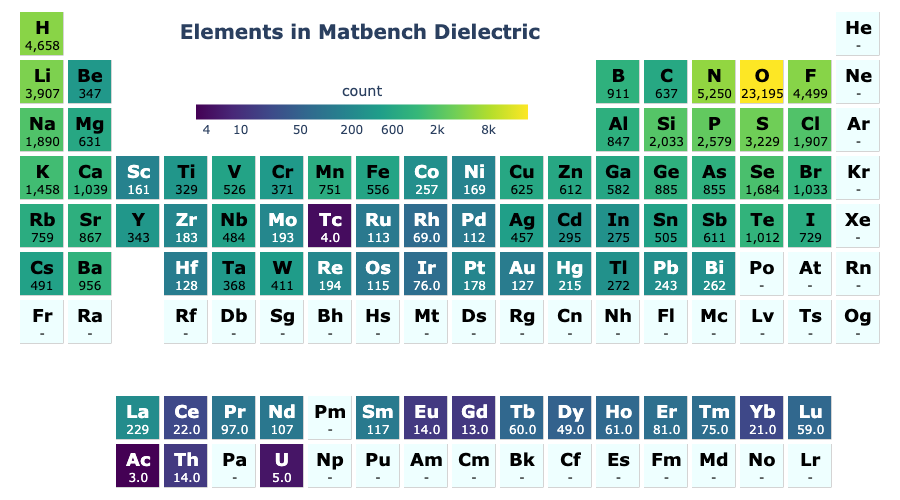

In [ ]:
df_diel[Key.volume] = df_diel[Key.structure].map(lambda cryst: cryst.volume)
df_diel[Key.formula] = df_diel[Key.structure].map(lambda cryst: cryst.formula)

fig = pmv.ptable_heatmap_plotly(pmv.count_elements(df_diel[Key.formula]), log=True)
fig.layout.title.update(text="<b>Elements in Matbench Dielectric</b>", font_size=20)
fig.show()

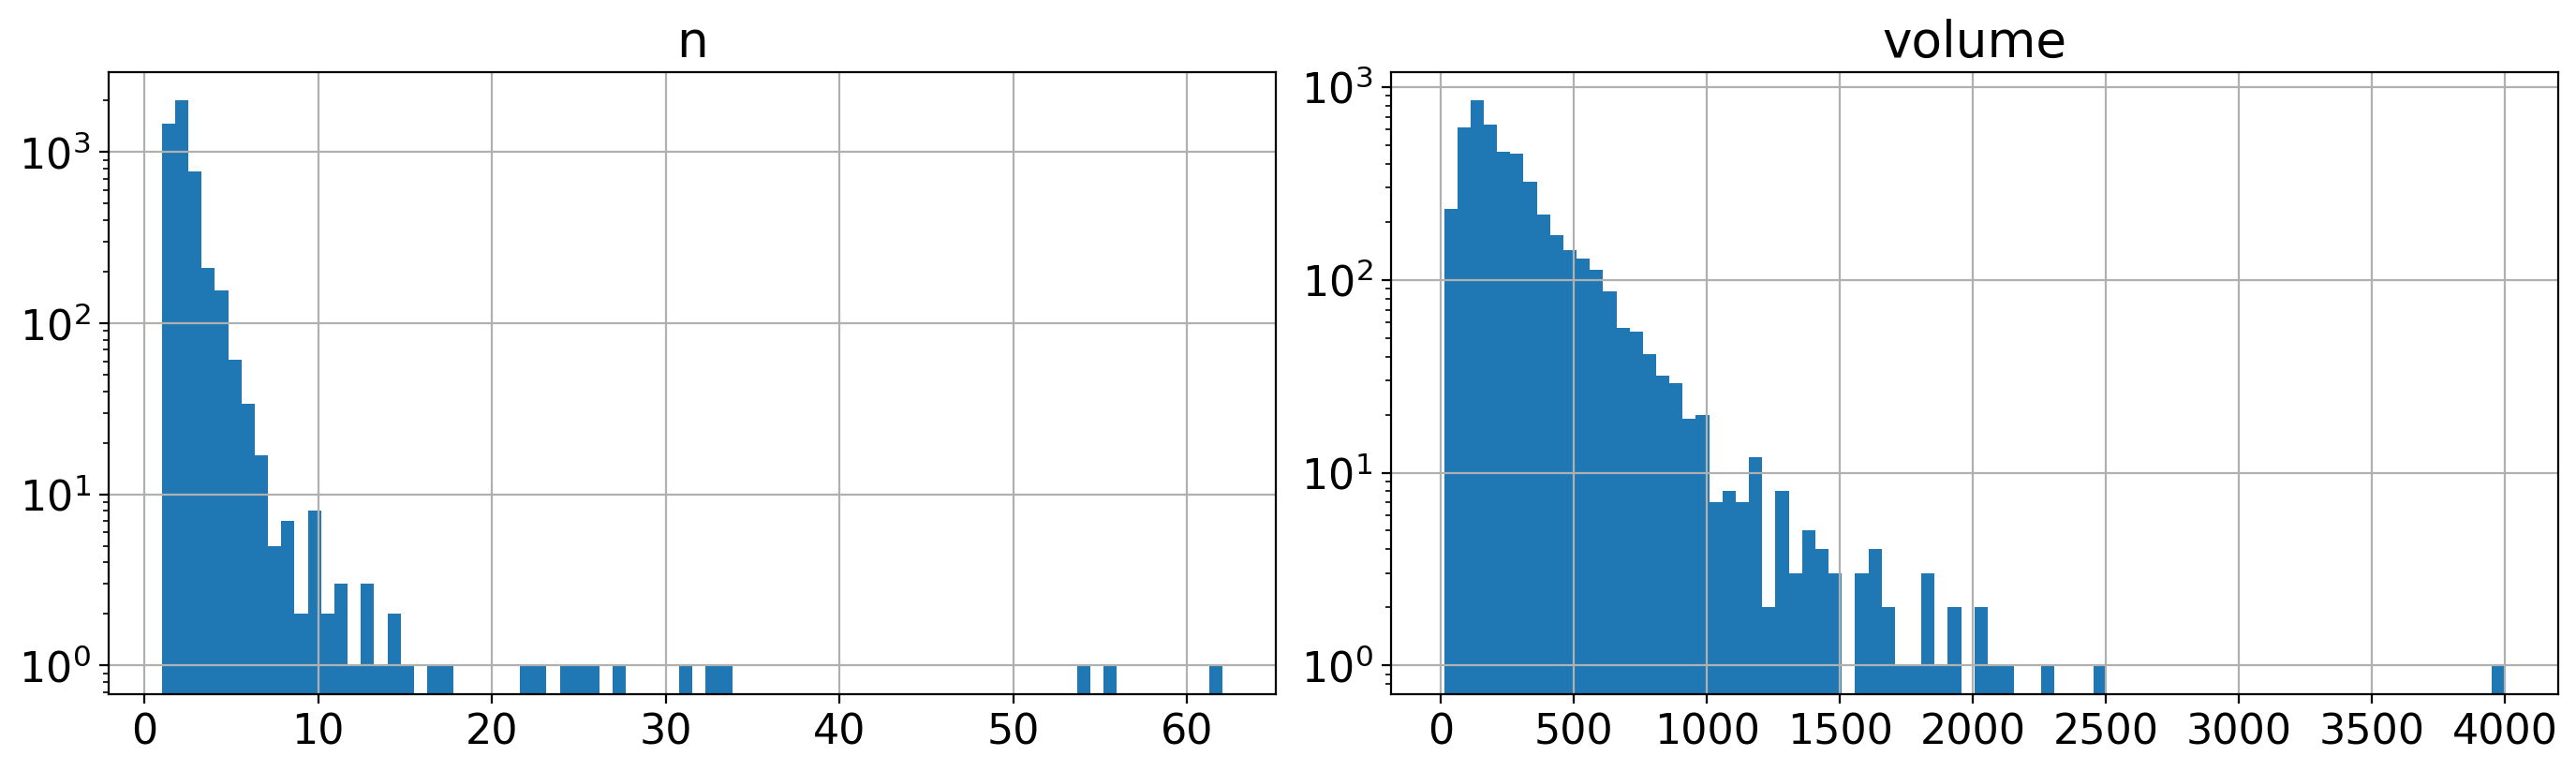

In [ ]:
_ = df_diel.hist(bins=80, log=True, figsize=(20, 4), layout=(1, 3))

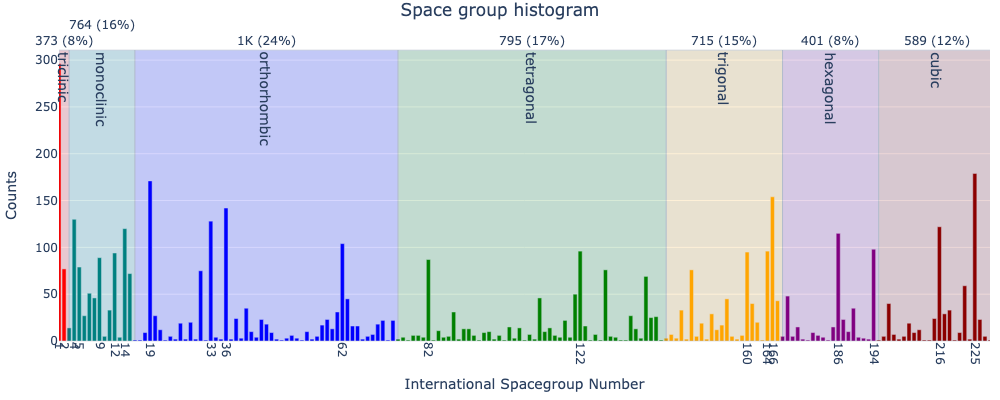

In [ ]:
fig = pmv.spacegroup_bar(df_diel[Key.spg_num])
fig.layout.title.update(text="Space group histogram", y=0.99)
fig.layout.margin.update(l=10, r=10, t=50, b=10)
fig.layout.update(width=1000, height=400)
fig.show()

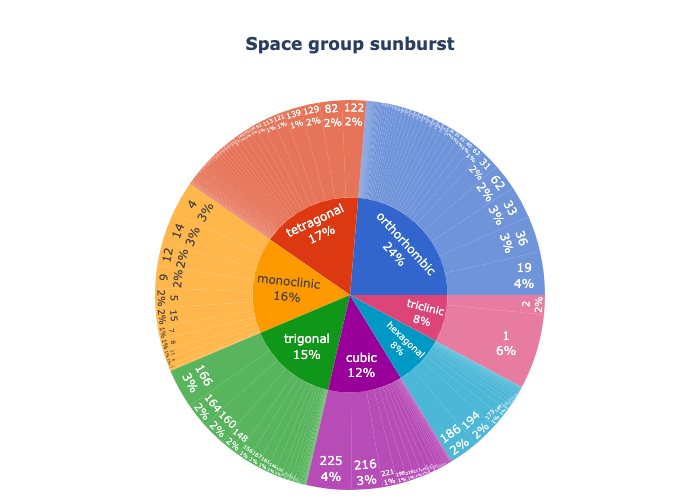

In [ ]:
fig = pmv.spacegroup_sunburst(df_diel[Key.spg_num], show_counts="percent")
fig.layout.title.update(text="<b>Space group sunburst</b>", x=0.5)
fig.show()

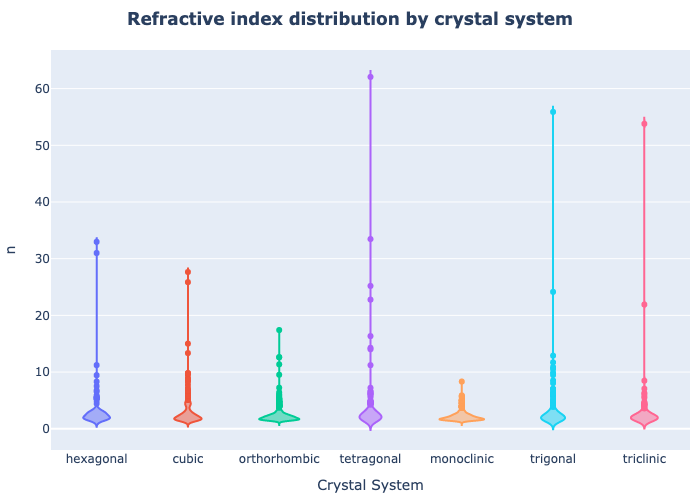

In [ ]:
fig = px.violin(df_diel, color=Key.crystal_system, x=Key.crystal_system, y="n")
title = "<b>Refractive index distribution by crystal system</b>"
fig.layout.title = dict(text=title, x=0.5)
fig.layout.margin = dict(b=10, l=10, r=10, t=50)
fig.layout.showlegend = False
fig.show()